# 2-Semi-Random-Independent-Set

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import time
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from generators import planted_models
from algorithms import independent_set

GRAPH_COLOR = 'green'
HIGHLIGHT_COLOR = 'red'
%matplotlib inline

## 2.1 Visualization & Analysis Tools 

In [3]:
def visualize_highlight(graph, special):
    colors = []
    for vertex in graph.nodes:
        color = HIGHLIGHT_COLOR if vertex in special else GRAPH_COLOR
        colors.append(color)
    %matplotlib inline
    nx.draw(graph, node_color=colors)
    plt.show()

In [18]:
def average_performance(graph_generator, algorithm, evaluate, trials=50):
    times, outputs = [], []
    for _ in range(trials):
        graph = graph_generator()
        
        start = time.clock()
        result = algorithm(graph)
        end = time.clock()
        elapsed = end - start
        
        times.append(elapsed)
        outputs.append(evaluate(result))
        
    return {
        'trials': trials,
        'time': np.mean(times),
        'output': np.mean(outputs)
    }

## 2.2 Examples on Small Planted Sets

In [8]:
GRAPH_SIZE = 20
PLANTED_SIZE = 7
PROB = 0.5

graph, independent = planted_models.bernoulli_planted_independent(
    GRAPH_SIZE, PLANTED_SIZE, PROB)

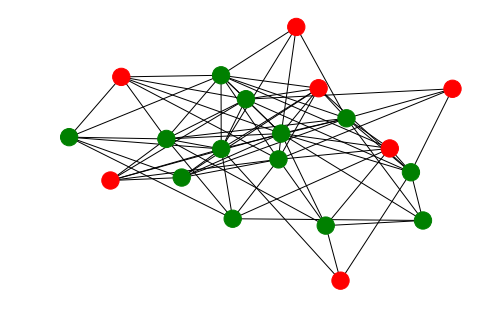

Planted Size: 7


In [9]:
visualize_highlight(graph, independent)
print('Planted Size:', len(independent))

### 2.2.1 Greedy Algorithm 

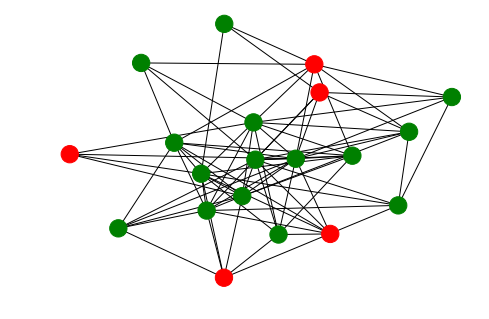

Recovered Size (Greedy): 5


In [10]:
result = independent_set.greedy_independent_set(graph)
visualize_highlight(graph, result)
print('Recovered Size (Greedy):', len(result))

### 2.2.2 Crude SDP Algorithm

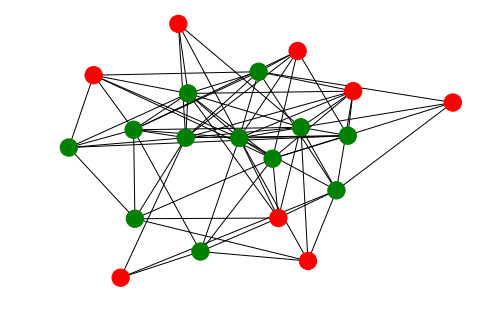

Recovered Size (C-SDP): 8


In [11]:
result = independent_set.crude_sdp_independent_set(graph)
visualize_highlight(graph, result)
print('Recovered Size (C-SDP):', len(result))

## 2.3 Performance Testing

In [22]:
GRAPH_SIZES = [5, 10, 25, 50, 100]
PLANTED_SIZES = [int(size / 3) for size in  GRAPH_SIZES]
PROB = 0.5
TRIALS = 50

In [35]:
greedy_outputs = []
csdp_outputs = []

for graph_size, planted_size in zip(GRAPH_SIZES, PLANTED_SIZES):
    graph_generator = lambda: planted_models.bernoulli_planted_independent(
        graph_size, planted_size, PROB)[0]
    
    greedy_output = average_performance(
        graph_generator,
        independent_set.greedy_independent_set,
        len,
        trials=TRIALS)
    greedy_outputs.append(greedy_output)
    
    csdp_output = average_performance(
        graph_generator,
        independent_set.crude_sdp_independent_set,
        len,
        trials=TRIALS)
    csdp_outputs.append(csdp_output)

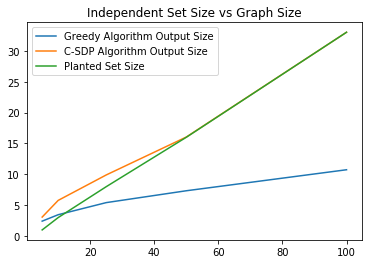

In [36]:
PLOTTING_OPTIONS = {
    'title': 'Independent Set Size vs Graph Size',
    'legend': [
        'Greedy Algorithm Output Size',
        'C-SDP Algorithm Output Size',
        'Planted Set Size'
    ]
}

plt.plot(GRAPH_SIZES, [result['output'] for result in greedy_outputs])
plt.plot(GRAPH_SIZES, [result['output'] for result in csdp_outputs])
plt.plot(GRAPH_SIZES, PLANTED_SIZES)
plt.title(PLOTTING_OPTIONS['title'])
plt.legend(PLOTTING_OPTIONS['legend'])
plt.show()

In [38]:
rows = []
for pos in range(len(GRAPH_SIZES)):
    rows.append([
        GRAPH_SIZES[pos],
        greedy_outputs[pos]['output'],
        csdp_outputs[pos]['output'],
        PLANTED_SIZES[pos]
    ])

table = pd.DataFrame(rows)
table.columns = [
    'Graph Size', 'Greedy Output Size', 'C-SDP Output Size', 'Planted Size']
table

,Graph Size,Greedy Output Size,C-SDP Output Size,Planted Size
0,5,2.42,3.08,1
1,10,3.46,5.78,3
2,25,5.42,9.90,8
3,50,7.34,16.04,16
4,100,10.74,33.00,33
